In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0.5, 0, 'petal length (cm)')

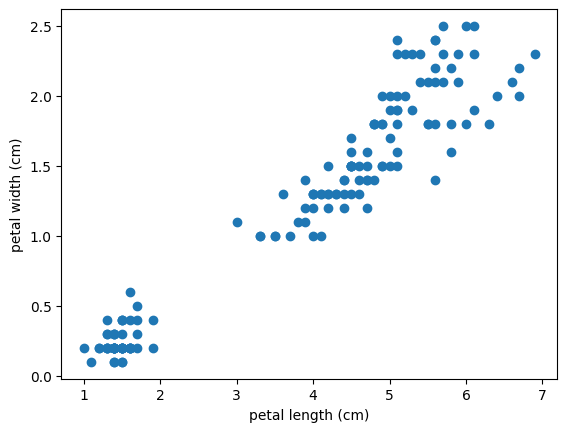

In [15]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal width (cm)','petal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
km.cluster_centers_

array([[1.35925926, 4.29259259],
       [0.246     , 1.462     ],
       [2.04782609, 5.62608696]])

In [14]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


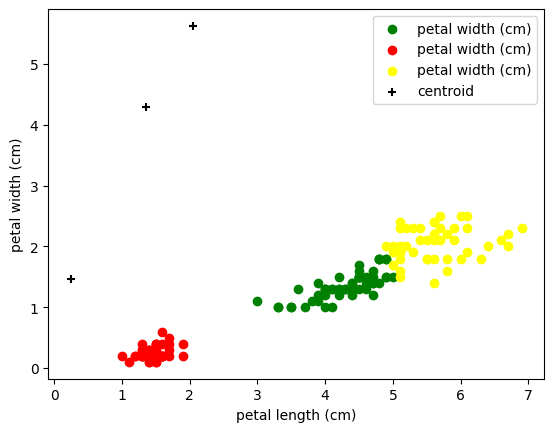

In [16]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green',label='petal width (cm)')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red',label='petal width (cm)')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='yellow',label='petal width (cm)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='black',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [18]:
scale = MinMaxScaler()
scale.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scale.transform(df[['petal length (cm)']])
scale.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scale.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [19]:
df = df.drop('cluster', axis=1)
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal width (cm)','petal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster'] = y_predicted
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


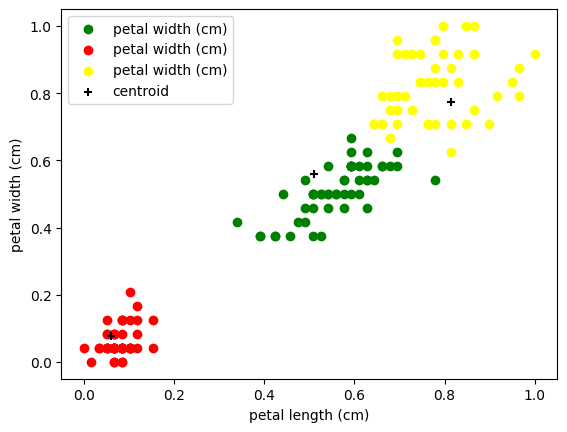

In [22]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green',label='petal width (cm)')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red',label='petal width (cm)')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='yellow',label='petal width (cm)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='black',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [25]:
km.cluster_centers_

array([[0.51041667, 0.55867014],
       [0.06083333, 0.07830508],
       [0.81510417, 0.7740113 ]])

In [27]:
km.inertia_

1.7018746881920963

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [30]:
sse

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1826653136050633,
 0.8538617353912238,
 0.7411567429130322,
 0.5656776810037091,
 0.5348903728726717,
 0.4754738613177192]

Text(0.5, 0, 'K')

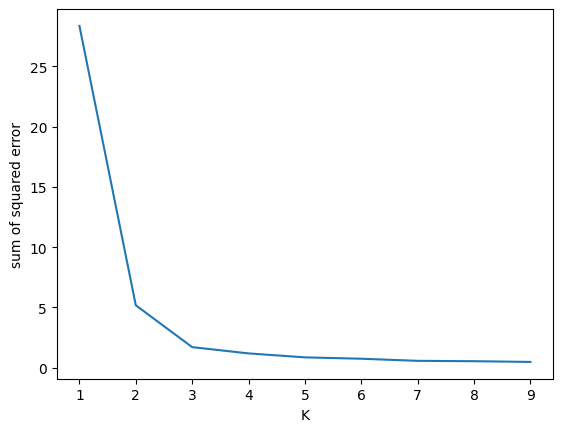

In [31]:
plt.plot(k_rng,sse)
plt.ylabel('sum of squared error')
plt.xlabel('K')